<a href="https://colab.research.google.com/github/annaberezov/akfie927/blob/main/Berezovski_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project One
##Anna-Maria Berezovski
##CSC 687
##February 14, 2022


## Imports and Data

In [30]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Read raw filefrom github into a dataframe
# Company_data: Amounts spent on different types of advertisements and the resulting Sales
df = pd.read_csv('heart.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Distribution Plots for Each Target Class

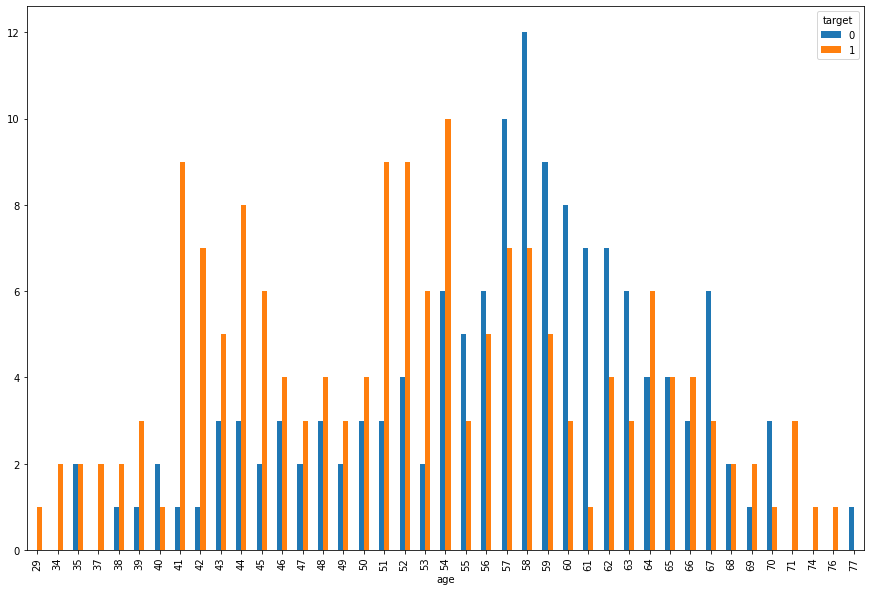

In [32]:
# First we will plot the distribution between age and the target
pd.crosstab(df['age'], df['target']).plot.bar(stacked=False, figsize=(15,10))

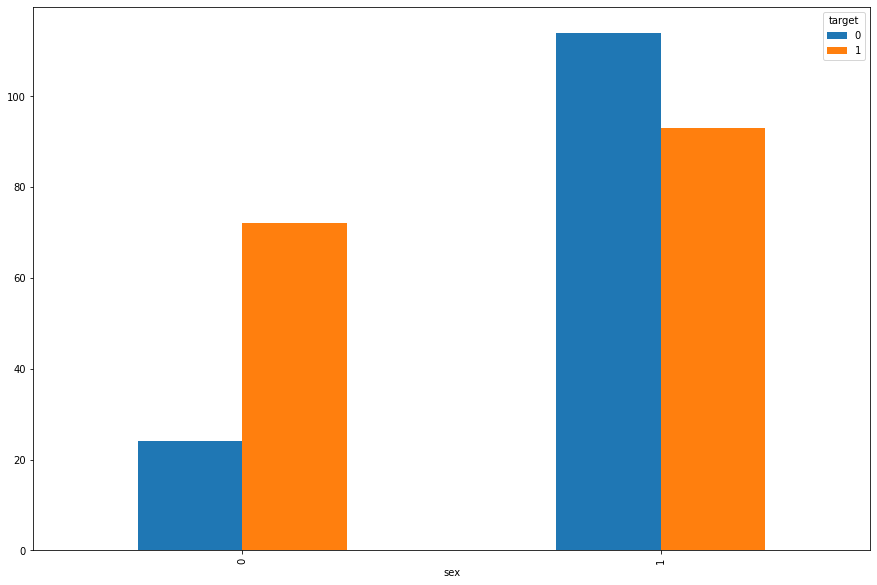

In [33]:
# Now we will plot the distribution between sex and the target
pd.crosstab(df['sex'], df['target']).plot.bar(stacked=False, figsize=(15,10))

## Correlation Values for All Features

First we are going to calculate pearsons r value for each variable against the target

In [34]:
corr_matrix = df.corr()

corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

Next, we are going to visually represent this using a heat map so we can better see where there are strong relationships between the data

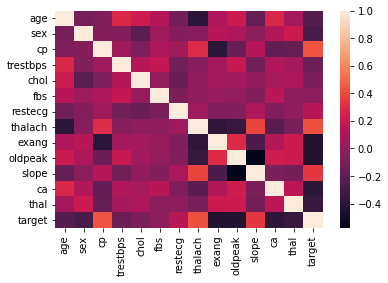

In [35]:
sns.heatmap(corr_matrix)

From this heatmap, we can see that there are stronger relationships between target and chest pain (cp), maximum heart rate achieved (thalach), ST depression induced by exervise relative to rest (oldpeak), and exercise induced angina (exang) with the fist two having a positive relationship and the latter having a negative relationship.

## Missing Feature values and Imputation

In [36]:
# We are going to first look for missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Seeing that the total number of entries is 303 and for each feature, we have a count of 303 non-null values. This indicates that we do not have any missing values so we do not need to impute the data.

## Testing ML Models
For all of these models, we will be using a 80/20 split

In [37]:
# Standardscale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)
raw_data = df.to_numpy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95313da550>,
      dtype=object)

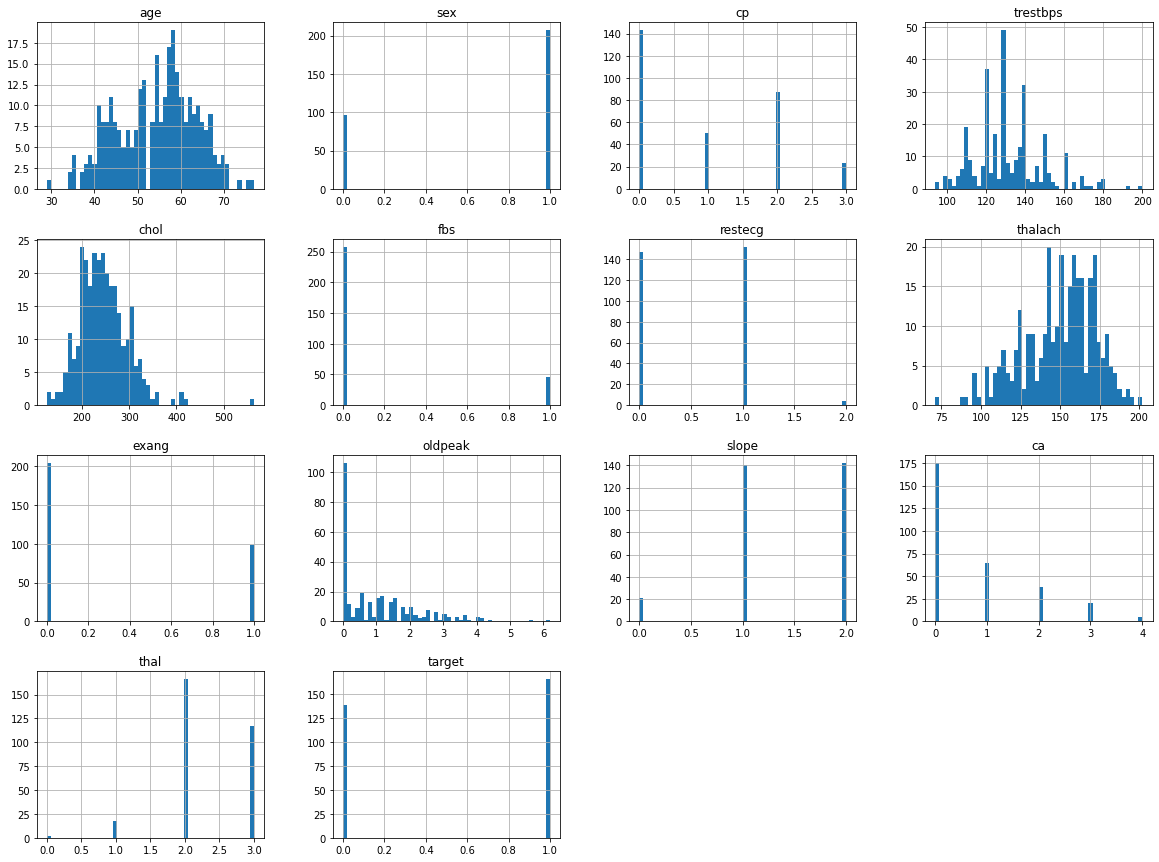

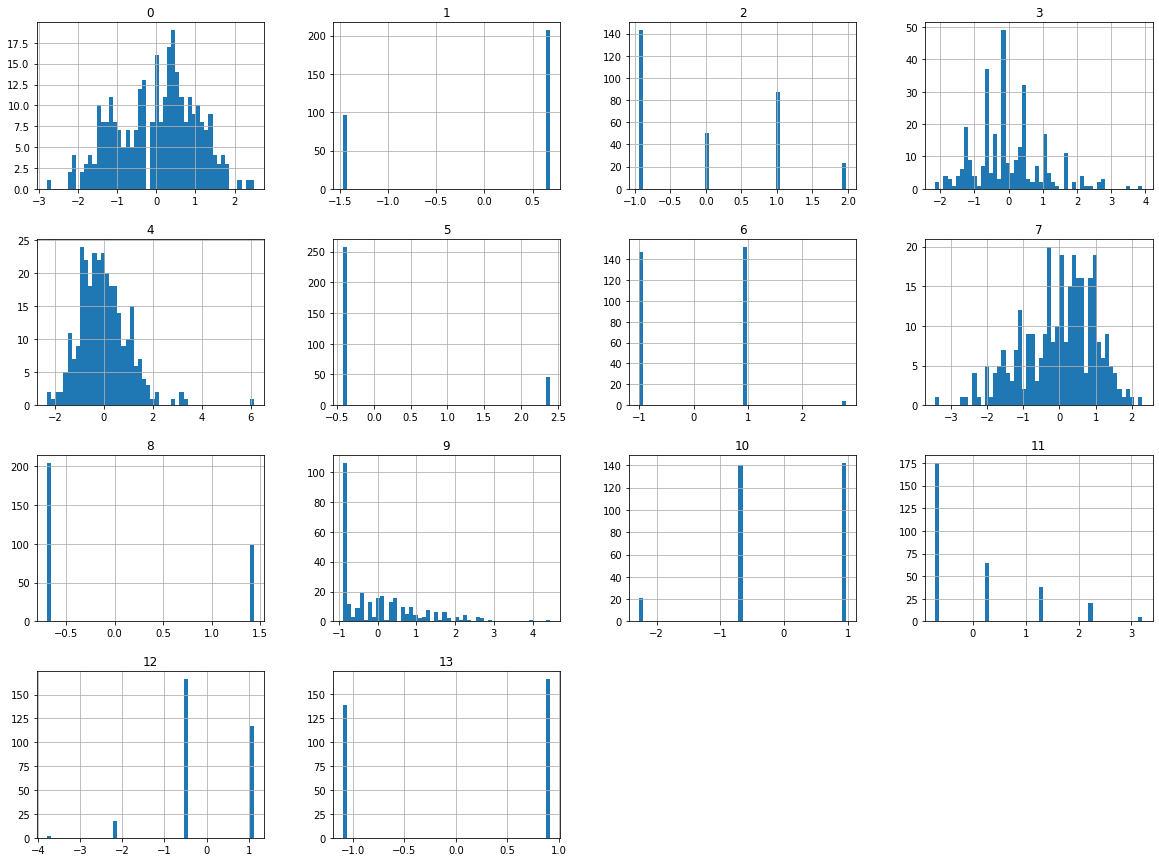

In [38]:
#Raw Data
df.hist(bins=50, figsize=(20,15))


#Scaled Data:
pd.DataFrame(scaled_data).hist(bins=50, figsize=(20,15))

### Logistic Regression
With scaled data

In [39]:
# logistic regression
from sklearn.model_selection import train_test_split

lr_scaled_X = scaled_data
lr_scaled_Y= df['target']

# Split the dataset (569 instances) into the training set (80%) and testing (20%)
lrs_X_train, lrs_X_test, lrs_Y_train, lrs_Y_test = train_test_split(lr_scaled_X, lr_scaled_Y, test_size = 0.20, random_state = 0)

# Perform logistic regression for the binary output 0 (no heart disease) and 1 (heart disease)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(lrs_X_train, lrs_Y_train)

# measure model accuracy
lrs_Y_pred = classifier.predict(lrs_X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

lr_predictions = classifier.predict(lrs_X_test)

labels = classifier.classes_

# compute TP, TN, FP, FN values
lrs_cm = confusion_matrix(y_true=lrs_Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
lrs_cr = classification_report(y_true=lrs_Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(lrs_cm, index=labels, columns=labels)

,0,1
0,27,0
1,0,34


In [41]:
# Accuracy scores on the training and testing sets

score1 = round(classifier.score(lrs_X_train, lrs_Y_train), 2) # training score
score2 = round(classifier.score(lrs_X_test, lrs_Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 1.00, 1.00


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


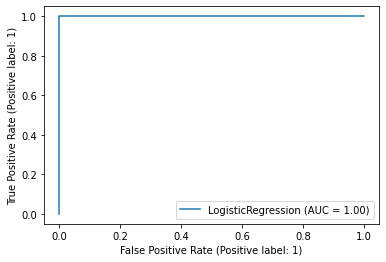

In [42]:
# ROC Curve
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
roc = plot_roc_curve(classifier, lrs_X_test, lrs_Y_test, ax=ax)

plt.show()

###Logistic Regression
With raw data

In [43]:
# logistic regression
from sklearn.model_selection import train_test_split

lrr_X = raw_data
lrr_Y= df['target']

# Split the dataset (569 instances) into the training set (80%) and testing (20%)
lrr_X_train, lrr_X_test, lrr_Y_train, lrr_Y_test = train_test_split(lrr_X, lrr_Y, test_size = 0.20, random_state = 0)

# Perform logistic regression for the binary output 0 (no heart disease) and 1 (heart disease)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(lrr_X_train, lrr_Y_train)

# measure model accuracy
Y_pred = classifier.predict(lrr_X_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

lr_predictions = classifier.predict(lrr_X_test)

labels = classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=lrr_Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=lrr_Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,27,0
1,0,34


### Random Forest
With scaled data

In [45]:
rfs_X = scaled_data
rfs_Y= df['target']

# Split the dataset (569 instances) into the training set (80%) and testing (20%)
rfs_X_train, rfs_X_test, rfs_Y_train, rfs_Y_test = train_test_split(rfs_X, rfs_Y, test_size = 0.20, random_state = 0)

from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(rfs_X_train, rfs_Y_train)

RandomForestClassifier(n_jobs=5)

In [46]:
# Accuracy scores on the training and testing sets

score3 = round(rf_classifier.score(rfs_X_train, rfs_Y_train), 2) # training score
score4 = round(rf_classifier.score(rfs_X_test, rfs_Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score3, score4))

Training and Testing scores: 1.00, 1.00


In [47]:
# The confusion matrix

rf_predictions = rf_classifier.predict(rfs_X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=rfs_Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=rfs_Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,27,0
1,0,34


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


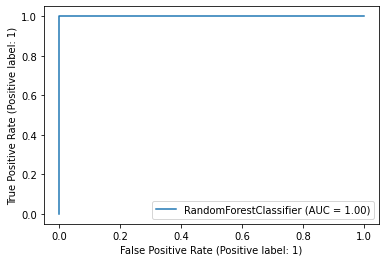

In [48]:
# ROC Curve
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
roc = plot_roc_curve(rf_classifier, rfs_X_test, rfs_Y_test, ax=ax)

plt.show()

### Random Forest
With raw data

In [49]:
rfr_X = raw_data
rfr_Y= df['target']

# Split the dataset (569 instances) into the training set (80%) and testing (20%)
rfr_X_train, rfr_X_test, rfr_Y_train, rfr_Y_test = train_test_split(rfr_X, rfr_Y, test_size = 0.20, random_state = 0)

from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(rfr_X_train, rfr_Y_train)

RandomForestClassifier(n_jobs=5)

In [50]:
# The confusion matrix

rf_predictions = rf_classifier.predict(rfr_X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=rfr_Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=rfr_Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,27,0
1,0,34


### SGD Classifier
With scaled data

In [51]:
# Let's use SGD classifier this time 
# Parallelize the job over 5 workers

sgds_X = scaled_data
sgds_Y= df['target']

# Split the dataset (569 instances) into the training set (80%) and testing (20%)
sgds_X_train, sgds_X_test, sgds_Y_train, sgds_Y_test = train_test_split(sgds_X, sgds_Y, test_size = 0.20, random_state = 0)

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(sgds_X_train, sgds_Y_train)

SGDClassifier(n_jobs=5, random_state=42)

In [52]:
# Accuracy scores on the training and testing sets

score5 = round(sgd_classifier.score(sgds_X_train, sgds_Y_train), 2) # training score
score6 = round(sgd_classifier.score(sgds_X_test, sgds_Y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score5, score6))

Training and Testing scores: 1.00, 1.00


In [53]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(sgds_X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=sgds_Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=sgds_Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,27,0
1,0,34


In [54]:
# Print the classification report 

print(sgd_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


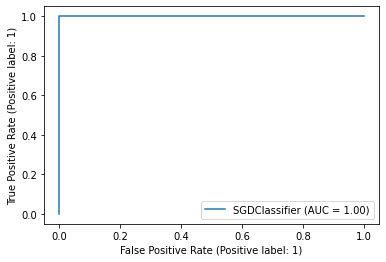

In [55]:
# ROC Curve
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
roc = plot_roc_curve(sgd_classifier, sgds_X_test, sgds_Y_test, ax=ax)

plt.show()

### SGD Classifier
With raw data

In [56]:
# Let's use SGD classifier this time 
# Parallelize the job over 5 workers

sgds_X = raw_data
sgds_Y= df['target']

# Split the dataset (569 instances) into the training set (80%) and testing (20%)
sgds_X_train, sgds_X_test, sgds_Y_train, sgds_Y_test = train_test_split(sgds_X, sgds_Y, test_size = 0.20, random_state = 0)

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(sgds_X_train, sgds_Y_train)

SGDClassifier(n_jobs=5, random_state=42)

In [57]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(sgds_X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=sgds_Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=sgds_Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,0,27
1,0,34


## Summary of the 3 Models

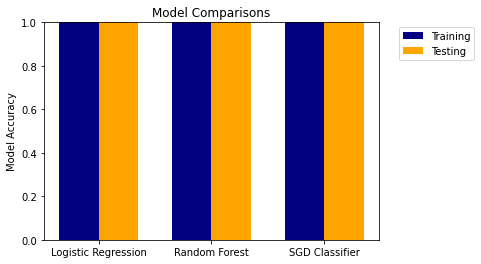

In [58]:
# Summarize the findings for all models

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Logistic Regression', 'Random Forest', 'SGD Classifier']
training_scores = [score1, score3, score5]
testing_scores =  [score2, score4, score6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()

##Summary
Overall, the models have the same accuracy with the scaled and raw data (but with the raw data in linear regression, we needed to manually change the number of iterations allowed since it was not converging with the default number). This level of accuracy comes from the 80/20 split since 80% of the dataset is being used to train the data and only 20% is being used to test, since we have a small dataset with only 330 points, there is not a lot of data points to test the models extensively. This is why I think all the models are so accurate. When I was playing around with it, I had to change the split to 50/50 to get models which were not 100% accurate in this case. 
This dataset, while clean and well put together, is rather small and thus not ideal for training and testing very extensive models. 